In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('04_result.csv').set_index('Unnamed: 0')
df.index.names = ['']

In [2]:
df.isna().sum()

ItraxxMain                                              0
ItraxxXover                                             0
CDX_IG                                                  0
SPX_Price                                               0
SPX_Volume                                              0
EuSt_Price                                              0
EuSt_Volume                                             0
Oil (WTI-Oklahoma)                                      0
Oil (Brent-EU)                                          0
Conventional Gasoline (NY Harbor)                       0
Conventional Gasoline (US Gulf Coast)                   0
RBOB Regular Gasoline (LA)                              0
No. 2 Heating Oil (NY Harbor)                           0
Ultra-Low-Sulfur No. 2 Diesel Fuel (NY Harbor)          0
Ultra-Low-Sulfur No. 2 Diesel Fuel (US Gulf Coast)      0
Ultra-Low-Sulfur No. 2 Diesel Fuel (LA)                 0
Kerosene-Type Jet Fuel (US Gulf Coast)                  0
Propane (Mont 

In [3]:
df = df.dropna(axis=1)
df

,ItraxxMain,ItraxxXover,CDX_IG,SPX_Price,SPX_Volume,EuSt_Price,EuSt_Volume,Oil (WTI-Oklahoma),Oil (Brent-EU),Conventional Gasoline (NY Harbor),...,USD/South Africa,USD/Indonesia,USD/Malaysia,USD/Philippines,USD/Thailand,USD/Switzerland,DXY_Open,DXY_Close,Australia_1_year_bonds_yield,United-Kingdom_1_year_bonds_yield
,,,,,,,,,,,,,,,,,,,,,
2007-03-20,100.0000,100.0000,100.0000,1410.94,1.182479e+09,4079.5200,9.134466e+08,56.41,60.11,1.914,...,7.381947,8775.533193,3.491439,48.196906,32.490237,1.211926,83.31,83.11,6.265,5.432
2007-03-21,100.0287,100.2951,100.0850,1435.04,1.399847e+09,4078.2900,8.624504e+08,56.98,60.18,1.910,...,7.267184,8724.755430,3.446974,47.765505,31.887454,1.208374,83.08,82.77,6.250,5.482
2007-03-22,100.0833,100.8037,100.1147,1434.54,1.286669e+09,4170.0801,1.174437e+09,60.21,61.57,1.914,...,7.197165,8767.286486,3.465127,47.786861,31.637918,1.213889,82.74,83.09,6.280,5.490
2007-03-23,100.1090,100.8924,100.1108,1436.11,1.122459e+09,4191.5801,9.219071e+08,61.07,63.10,1.930,...,7.215838,8791.682184,3.454087,47.861924,32.061367,1.217568,83.10,83.28,6.260,5.527
2007-03-26,100.1063,100.7493,100.0683,1437.50,1.187999e+09,4142.1099,9.893587e+08,61.77,64.43,2.000,...,7.212871,8684.743474,3.451620,47.907291,32.197720,1.215347,83.39,83.08,6.280,5.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,116.2111,218.0884,112.2719,4649.23,6.201414e+08,4174.9902,2.725863e+08,71.10,72.85,2.207,...,15.837798,14278.515069,4.205804,49.877442,33.654941,0.923365,96.54,96.49,0.250,0.439
2021-12-22,116.2445,218.5824,112.3261,4696.56,4.564783e+08,4217.0601,1.945563e+08,72.82,74.69,2.222,...,15.719020,14217.417139,4.212684,50.203031,33.680573,0.920553,96.47,96.08,0.241,0.462
2021-12-23,116.3149,219.2426,112.3691,4725.79,4.332652e+08,4265.8599,2.421080e+08,73.89,76.26,2.257,...,15.650105,14176.992998,4.198359,50.078973,33.492546,0.919119,96.03,96.06,0.244,0.483


In [4]:
df = np.log(df/df.shift(1))
df = df.add_prefix('return: ')

df = df[1:]
df = df.dropna(axis=1)

C:\Users\artem\anaconda3\envs\workspace\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [5]:
targets = ['future_return-Itraxx-Main',
           'future_return-Itraxx-Xover',
           'future_return-CDX_IG',
           'future_return-SPX',
           'future_return-Euro-Stoxx']

df['future_return: Itraxx Main'] = df['return: ItraxxMain'].shift(-1)
df['future_return: Itraxx Xover'] = df['return: ItraxxXover'].shift(-1)
df['future_return: CDX_IG'] = df['return: CDX_IG'].shift(-1)
df['future_return: SPX'] = df['return: SPX_Price'].shift(-1)
df['future_return: Euro Stoxx'] = df['return: EuSt_Price'].shift(-1)
df

,return: ItraxxMain,return: ItraxxXover,return: CDX_IG,return: SPX_Price,return: SPX_Volume,return: EuSt_Price,return: EuSt_Volume,return: Oil (Brent-EU),return: Conventional Gasoline (NY Harbor),return: Conventional Gasoline (US Gulf Coast),...,return: USD/Philippines,return: USD/Thailand,return: USD/Switzerland,return: DXY_Open,return: DXY_Close,future_return: Itraxx Main,future_return: Itraxx Xover,future_return: CDX_IG,future_return: SPX,future_return: Euro Stoxx
,,,,,,,,,,,,,,,,,,,,,
2007-03-21,0.000287,0.002947,0.000850,0.016937,0.168750,-0.000302,-0.057447,0.001164,-0.002092,-0.002718,...,-0.008991,-0.018727,-0.002935,-0.002765,-0.004099,0.000546,0.005058,0.000297,-0.000348,0.022257
2007-03-22,0.000546,0.005058,0.000297,-0.000348,-0.084306,0.022257,0.308767,0.022835,0.002092,0.005429,...,0.000447,-0.007856,0.004554,-0.004101,0.003859,0.000257,0.000880,-0.000039,0.001094,0.005143
2007-03-23,0.000257,0.000880,-0.000039,0.001094,-0.136535,0.005143,-0.242100,0.024546,0.008325,0.015046,...,0.001570,0.013295,0.003026,0.004342,0.002284,-0.000027,-0.001419,-0.000425,0.000967,-0.011872
2007-03-26,-0.000027,-0.001419,-0.000425,0.000967,0.056749,-0.011872,0.070612,0.020859,0.035627,0.025278,...,0.000947,0.004244,-0.001826,0.003484,-0.002404,-0.000081,-0.000047,-0.000206,-0.006204,0.002773
2007-03-27,-0.000081,-0.000047,-0.000206,-0.006204,-0.035369,0.002773,-0.242530,-0.002798,0.003494,0.000000,...,-0.001611,-0.011435,-0.004079,-0.003724,-0.000843,-0.000064,-0.003553,-0.000731,-0.007998,-0.006136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,0.000672,0.002942,0.000822,0.017622,-0.093973,0.016388,-0.233767,0.032648,0.026632,0.029924,...,0.000375,0.001832,0.002491,-0.001346,-0.000622,0.000287,0.002263,0.000483,0.010129,0.010026
2021-12-22,0.000287,0.002263,0.000483,0.010129,-0.306406,0.010026,-0.337234,0.024944,0.006774,0.007924,...,0.006507,0.000761,-0.003050,-0.000725,-0.004258,0.000605,0.003016,0.000383,0.006204,0.011506
2021-12-23,0.000605,0.003016,0.000383,0.006204,-0.052191,0.011506,0.218662,0.020802,0.015629,0.019766,...,-0.002474,-0.005598,-0.001559,-0.004571,-0.000208,-0.000009,-0.000824,0.000328,0.014134,0.004437


In [6]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '-', x))

In [7]:
df.columns

Index(['return-ItraxxMain', 'return-ItraxxXover', 'return-CDX_IG',
       'return-SPX_Price', 'return-SPX_Volume', 'return-EuSt_Price',
       'return-EuSt_Volume', 'return-Oil-Brent-EU-',
       'return-Conventional-Gasoline-NY-Harbor-',
       'return-Conventional-Gasoline-US-Gulf-Coast-',
       'return-RBOB-Regular-Gasoline-LA-',
       'return-No-2-Heating-Oil-NY-Harbor-',
       'return-Ultra-Low-Sulfur-No-2-Diesel-Fuel-NY-Harbor-',
       'return-Ultra-Low-Sulfur-No-2-Diesel-Fuel-US-Gulf-Coast-',
       'return-Ultra-Low-Sulfur-No-2-Diesel-Fuel-LA-',
       'return-Kerosene-Type-Jet-Fuel-US-Gulf-Coast-',
       'return-Propane-Mont-Belvieu-TX-', 'return-USD-China',
       'return-USD-Europe', 'return-USD-Japan', 'return-USD-Canada',
       'return-USD-Korea', 'return-USD-UK', 'return-USD-Turkey',
       'return-USD-Singapore', 'return-USD-Australia',
       'return-USD-South-Africa', 'return-USD-Indonesia',
       'return-USD-Malaysia', 'return-USD-Philippines', 'return-USD-Thai

In [8]:
features = set(df.columns) - set(targets)

## LGBM fit

In [9]:
year = []
for i in df.index:
    year.append(i[:4])
df['_year'] = year
df

,return-ItraxxMain,return-ItraxxXover,return-CDX_IG,return-SPX_Price,return-SPX_Volume,return-EuSt_Price,return-EuSt_Volume,return-Oil-Brent-EU-,return-Conventional-Gasoline-NY-Harbor-,return-Conventional-Gasoline-US-Gulf-Coast-,...,return-USD-Thailand,return-USD-Switzerland,return-DXY_Open,return-DXY_Close,future_return-Itraxx-Main,future_return-Itraxx-Xover,future_return-CDX_IG,future_return-SPX,future_return-Euro-Stoxx,_year
,,,,,,,,,,,,,,,,,,,,,
2007-03-21,0.000287,0.002947,0.000850,0.016937,0.168750,-0.000302,-0.057447,0.001164,-0.002092,-0.002718,...,-0.018727,-0.002935,-0.002765,-0.004099,0.000546,0.005058,0.000297,-0.000348,0.022257,2007
2007-03-22,0.000546,0.005058,0.000297,-0.000348,-0.084306,0.022257,0.308767,0.022835,0.002092,0.005429,...,-0.007856,0.004554,-0.004101,0.003859,0.000257,0.000880,-0.000039,0.001094,0.005143,2007
2007-03-23,0.000257,0.000880,-0.000039,0.001094,-0.136535,0.005143,-0.242100,0.024546,0.008325,0.015046,...,0.013295,0.003026,0.004342,0.002284,-0.000027,-0.001419,-0.000425,0.000967,-0.011872,2007
2007-03-26,-0.000027,-0.001419,-0.000425,0.000967,0.056749,-0.011872,0.070612,0.020859,0.035627,0.025278,...,0.004244,-0.001826,0.003484,-0.002404,-0.000081,-0.000047,-0.000206,-0.006204,0.002773,2007
2007-03-27,-0.000081,-0.000047,-0.000206,-0.006204,-0.035369,0.002773,-0.242530,-0.002798,0.003494,0.000000,...,-0.011435,-0.004079,-0.003724,-0.000843,-0.000064,-0.003553,-0.000731,-0.007998,-0.006136,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,0.000672,0.002942,0.000822,0.017622,-0.093973,0.016388,-0.233767,0.032648,0.026632,0.029924,...,0.001832,0.002491,-0.001346,-0.000622,0.000287,0.002263,0.000483,0.010129,0.010026,2021
2021-12-22,0.000287,0.002263,0.000483,0.010129,-0.306406,0.010026,-0.337234,0.024944,0.006774,0.007924,...,0.000761,-0.003050,-0.000725,-0.004258,0.000605,0.003016,0.000383,0.006204,0.011506,2021
2021-12-23,0.000605,0.003016,0.000383,0.006204,-0.052191,0.011506,0.218662,0.020802,0.015629,0.019766,...,-0.005598,-0.001559,-0.004571,-0.000208,-0.000009,-0.000824,0.000328,0.014134,0.004437,2021


In [10]:
all_df = df
valid_df = df[df['_year'].isin(['2016', '2017', '2018'])]
df = df[df['_year'].isin(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])]

In [11]:
df[features]

C:\Users\artem\AppData\Local\Temp\ipykernel_11800\1211022544.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[features]


,return-USD-UK,return-Ultra-Low-Sulfur-No-2-Diesel-Fuel-US-Gulf-Coast-,return-RBOB-Regular-Gasoline-LA-,return-EuSt_Price,return-SPX_Volume,return-USD-Turkey,return-Conventional-Gasoline-NY-Harbor-,return-USD-South-Africa,return-USD-Europe,return-USD-Thailand,...,return-USD-Canada,return-SPX_Price,return-ItraxxMain,return-DXY_Open,return-EuSt_Volume,return-DXY_Close,return-Kerosene-Type-Jet-Fuel-US-Gulf-Coast-,return-CDX_IG,return-No-2-Heating-Oil-NY-Harbor-,return-Ultra-Low-Sulfur-No-2-Diesel-Fuel-NY-Harbor-
,,,,,,,,,,,,,,,,,,,,,
2007-03-21,-0.003271,-0.002709,0.001264,-0.000302,0.168750,-0.001803,-0.002092,-0.015669,-0.006214,-0.018727,...,-0.003240,0.016937,0.000287,-0.002765,-0.057447,-0.004099,-0.002793,0.000850,-0.002984,-0.002739
2007-03-22,0.001627,0.069680,-0.030351,0.022257,-0.084306,-0.002037,0.002092,-0.009682,0.004864,-0.007856,...,0.001241,-0.000348,0.000546,-0.004101,0.308767,0.003859,0.022672,0.000297,0.027124,0.036622
2007-03-23,0.001449,-0.016327,-0.020167,0.005143,-0.136535,0.001116,0.008325,0.002591,0.002778,0.013295,...,0.001871,0.001094,0.000257,0.004342,-0.242100,0.002284,0.002730,-0.000039,-0.004665,-0.009031
2007-03-26,-0.004104,0.088082,0.114135,-0.011872,0.056749,0.019374,0.035627,-0.000411,-0.002628,0.004244,...,0.000544,0.000967,-0.000027,0.003484,0.070612,-0.002404,0.037458,-0.000425,0.034466,0.041291
2007-03-27,0.001658,-0.022387,0.008655,0.002773,-0.035369,-0.017124,0.003494,0.005885,-0.002472,-0.011435,...,-0.003766,-0.006204,-0.000081,-0.003724,-0.242530,-0.000843,0.007326,-0.000206,0.007314,0.006634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,0.005316,0.046344,0.138076,0.022262,-0.010781,0.007198,0.064224,0.005070,-0.003384,-0.001432,...,-0.002137,0.012342,0.001399,-0.002542,0.078318,0.001729,0.040625,0.001215,0.039180,0.042917
2015-12-24,-0.003722,-0.018657,-0.020357,-0.000673,-0.784812,-0.005039,0.006279,0.003637,0.003751,-0.000184,...,-0.004749,-0.001600,-0.000147,0.001221,-2.396045,-0.004993,-0.019139,0.000147,-0.003038,-0.014720
2015-12-29,-0.000999,0.018657,-0.046300,0.009035,0.431936,-0.004493,0.015528,0.004872,-0.006031,0.000231,...,0.003059,0.008393,0.000860,-0.004383,1.929375,0.003467,0.016292,0.000698,0.076134,0.022905


In [12]:
targets

['future_return-Itraxx-Main',
 'future_return-Itraxx-Xover',
 'future_return-CDX_IG',
 'future_return-SPX',
 'future_return-Euro-Stoxx']

[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[1]	valid_0's l2: 2.12915e-05
[2]	valid_0's l2: 2.10063e-05
[3]	valid_0's l2: 2.08595e-05
[4]	valid_0's l2: 2.06969e-05
[5]	valid_0's l2: 2.06434e-05
[6]	valid_0's l2: 2.05245e-05
[7]	valid_0's l2: 2.06328e-05
[8]	valid_0's l2: 2.05884e-05
[9]	valid_0's l2: 2.0461e-05
[10]	valid_0's l2: 2.05266e-05
[11]	valid_0's l2: 2.04822e-05
[12]	valid_0's l2: 2.12777e-05
[13]	valid_0's l2: 2.11487e-05
[14]	valid_0's l2: 2.13202e-05
[15]	valid_0's l2: 2.13098e-05
[16]	valid_0's l2: 2.14137e-05
[17]	valid_0's l2: 2.14548e-05
[18]	valid_0's l2: 2.14779e-05
[19]	valid_0's l2: 2.1466e-05


C:\Users\artem\AppData\Local\Temp\ipykernel_11800\412784645.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = df[features][:1800]
C:\Users\artem\AppData\Local\Temp\ipykernel_11800\412784645.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_es = df[features][1800:]
C:\Users\artem\AppData\Local\Temp\ipykernel_11800\412784645.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  np.corrcoef(model.predict(valid_df[features]), valid_df[to_pred])


array([[1.        , 0.26127684],
       [0.26127684, 1.        ]])

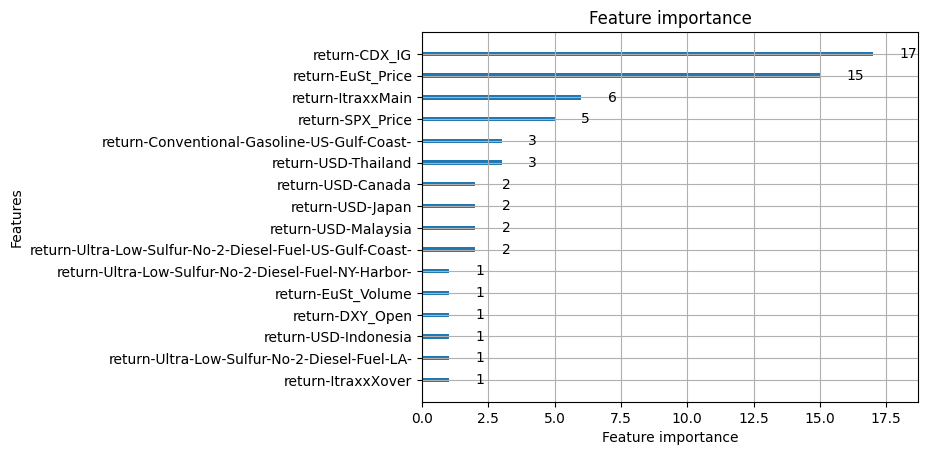

In [18]:
from lightgbm import LGBMRegressor
import lightgbm

to_pred = targets[1]

X_train = df[features][:1800]
y_train = df[to_pred][:1800]

X_es = df[features][1800:]
y_es = df[to_pred][1800:]

params = {'objective': 'regression', 'learning_rate': 0.1, 'num_leaves': 8, 'early_stopping_rounds': 10, 'verbose': -1, 'linear_tree': True}

model = LGBMRegressor(**params)
model.fit(X_train, y_train, eval_set=[(X_es, y_es)])

lightgbm.plot_importance(model)
np.corrcoef(model.predict(valid_df[features]), valid_df[to_pred])

In [14]:
# 0.28
# 0.26
# 0.07
# -0.01
# 0.25

So i will manage a portfolio of

Itraxx-Main
Itraxx-Xover
Euro-Stoxx

In [20]:
to_pred = targets[1]

X_train = df[features][:1800]
y_train = df[to_pred][:1800]

X_es = df[features][1800:]
y_es = df[to_pred][1800:]

params = {'objective': 'regression', 'learning_rate': 0.1, 'num_leaves': 8, 'early_stopping_rounds': 10, 'verbose': -1, 'linear_tree': True}

model = LGBMRegressor(**params)
model.fit(X_train, y_train, eval_set=[(X_es, y_es)])

all_df['prediction: ' + to_pred] = model.predict(all_df[features])

[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[1]	valid_0's l2: 2.12915e-05
[2]	valid_0's l2: 2.10063e-05
[3]	valid_0's l2: 2.08595e-05
[4]	valid_0's l2: 2.06969e-05
[5]	valid_0's l2: 2.06434e-05
[6]	valid_0's l2: 2.05245e-05
[7]	valid_0's l2: 2.06328e-05
[8]	valid_0's l2: 2.05884e-05
[9]	valid_0's l2: 2.0461e-05
[10]	valid_0's l2: 2.05266e-05
[11]	valid_0's l2: 2.04822e-05
[12]	valid_0's l2: 2.12777e-05
[13]	valid_0's l2: 2.11487e-05
[14]	valid_0's l2: 2.13202e-05
[15]	valid_0's l2: 2.13098e-05
[16]	valid_0's l2: 2.14137e-05
[17]	valid_0's l2: 2.14548e-05
[18]	valid_0's l2: 2.14779e-05
[19]	valid_0's l2: 2.1466e-05


C:\Users\artem\AppData\Local\Temp\ipykernel_11800\2708974755.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = df[features][:1800]
C:\Users\artem\AppData\Local\Temp\ipykernel_11800\2708974755.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_es = df[features][1800:]
C:\Users\artem\AppData\Local\Temp\ipykernel_11800\2708974755.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  all_df['prediction: ' + to_pred] = model.predict(all_df[features])


In [22]:
all_df

,return-ItraxxMain,return-ItraxxXover,return-CDX_IG,return-SPX_Price,return-SPX_Volume,return-EuSt_Price,return-EuSt_Volume,return-Oil-Brent-EU-,return-Conventional-Gasoline-NY-Harbor-,return-Conventional-Gasoline-US-Gulf-Coast-,...,return-DXY_Close,future_return-Itraxx-Main,future_return-Itraxx-Xover,future_return-CDX_IG,future_return-SPX,future_return-Euro-Stoxx,_year,prediction: future_return-Euro-Stoxx,prediction: future_return-Itraxx-Main,prediction: future_return-Itraxx-Xover
,,,,,,,,,,,,,,,,,,,,,
2007-03-21,0.000287,0.002947,0.000850,0.016937,0.168750,-0.000302,-0.057447,0.001164,-0.002092,-0.002718,...,-0.004099,0.000546,0.005058,0.000297,-0.000348,0.022257,2007,0.005626,0.000167,0.001720
2007-03-22,0.000546,0.005058,0.000297,-0.000348,-0.084306,0.022257,0.308767,0.022835,0.002092,0.005429,...,0.003859,0.000257,0.000880,-0.000039,0.001094,0.005143,2007,-0.001487,-0.000318,-0.002728
2007-03-23,0.000257,0.000880,-0.000039,0.001094,-0.136535,0.005143,-0.242100,0.024546,0.008325,0.015046,...,0.002284,-0.000027,-0.001419,-0.000425,0.000967,-0.011872,2007,-0.000241,0.000044,0.000059
2007-03-26,-0.000027,-0.001419,-0.000425,0.000967,0.056749,-0.011872,0.070612,0.020859,0.035627,0.025278,...,-0.002404,-0.000081,-0.000047,-0.000206,-0.006204,0.002773,2007,-0.000092,-0.000070,-0.000549
2007-03-27,-0.000081,-0.000047,-0.000206,-0.006204,-0.035369,0.002773,-0.242530,-0.002798,0.003494,0.000000,...,-0.000843,-0.000064,-0.003553,-0.000731,-0.007998,-0.006136,2007,-0.000502,0.000043,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,0.000672,0.002942,0.000822,0.017622,-0.093973,0.016388,-0.233767,0.032648,0.026632,0.029924,...,-0.000622,0.000287,0.002263,0.000483,0.010129,0.010026,2021,0.000797,0.000116,0.001069
2021-12-22,0.000287,0.002263,0.000483,0.010129,-0.306406,0.010026,-0.337234,0.024944,0.006774,0.007924,...,-0.004258,0.000605,0.003016,0.000383,0.006204,0.011506,2021,0.000751,0.000105,0.000666
2021-12-23,0.000605,0.003016,0.000383,0.006204,-0.052191,0.011506,0.218662,0.020802,0.015629,0.019766,...,-0.000208,-0.000009,-0.000824,0.000328,0.014134,0.004437,2021,0.000029,0.000085,0.000581


In [23]:
all_df.to_csv('predicts.csv')